In [2]:
import pandas as pd
import seaborn as sns

In [4]:
edw_1 = pd.read_csv('KEDW-01-26-22-7PM-24HRS')
edw_2 = pd.read_csv('KEDW-01-26-22-7AM-24HRS')
nfl_1 = pd.read_csv('KNFL-01-26-22-7PM-24HRS')
nfl_2 = pd.read_csv('KNFL-01-26-22-7AM-24HRS')
ntu_1 = pd.read_csv('KNTU-01-26-22-7PM-24HRS')
ntu_2 = pd.read_csv('KNTU-01-26-22-7AM-24HRS')

In [5]:
edw = pd.concat([edw_1, edw_2])
nfl = pd.concat([nfl_1, nfl_2])
ntu = pd.concat([ntu_1, ntu_2])

## Overall Amount of Aircraft Flying within a 5 Mile Radius

In [10]:
print('EDW: ' + str(edw['callsign'].nunique()))
print('NFL: ' + str(nfl['callsign'].nunique()))
print('NTU: ' + str(ntu['callsign'].nunique()))

EDW: 9
NFL: 28
NTU: 83


<AxesSubplot:>

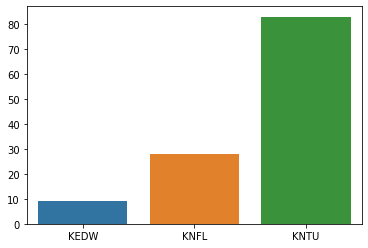

In [45]:
sns.barplot(x = ['KEDW', 'KNFL', 'KNTU'], y = [edw['callsign'].nunique(),nfl['callsign'].nunique(),ntu['callsign'].nunique()])

Thus here are the hourly rates of airplanes flying within 5 miles of the airport:
- KEDW: .375
- KNFL: 1.17
- KNTU: 3.46

However... I want to double-check to make sure this data makes sense. I'll check to ensure these aircrafts are actually landing at the airport and not simply flying above it.

## Quick Analysis of Types of Aircraft Flying Nearby

In [20]:
print(ntu['callsign'].head(10))

0    JBU553  
1    JBU553  
2    NKS1810 
3    NKS1810 
4    CMP832  
5    JBU1168 
6    JBU1168 
7    JBU1002 
8    JBU1154 
9    JBU1154 
Name: callsign, dtype: object


It seems that many aircraft are simply commercial aircraft that happen to be flying within the area. To assess whether these aircrafta are actually landing / departing from their respective sections, we can examine the altitudes of these aircraft.

## Amount of Aircraft Within 1000 Meters Above the Ground and Within a 5 Mile Radius

In [17]:
print('EDW: ' + str(edw[edw['geo_altitude']<1000]['callsign'].nunique()))
print('NFL: ' + str(nfl[nfl['geo_altitude']<1000]['callsign'].nunique()))
print('NTU: ' + str(ntu[ntu['geo_altitude']<1000]['callsign'].nunique()))

EDW: 0
NFL: 0
NTU: 0


It seems that no aircraft have been present in all three of these airports (in the 24 hour timeframe) within 1000 meters above the ground. Let's now look at the average altitude of aircraft:

In [26]:
print('EDW: ' + str(edw['geo_altitude'].mean()))
print('NFL: ' + str(nfl['geo_altitude'].mean()))
print('ENTU: ' + str(ntu['geo_altitude'].mean()))

EDW: 7043.2863157894735
NFL: 11082.983448275863
ENTU: 10391.28


Because no aircraft were at the altitude needed to land, the nubmers provided at the top likely do not encapsulate landing rate. Most likely, ADS-B data for military aircraft is not publically available / captured by the OpenSky Network. However, it might still be useful to understand how many aircrafts are flying within each airport's specified airspaces.

## Notable Exceptions

With that beings aid, there are some callsigns that seem to fit within the military environments of these airports.

In [40]:
nfl.iloc[11]['callsign']

'NASA747 '

In [42]:
edw.iloc[10]['callsign']

'JANET10 '